## Import Libraries & Load Dataset

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Fashion Mnist Dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

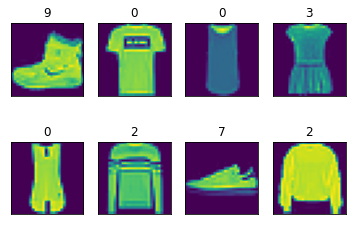

In [3]:
image_label = list(zip(X_train.reshape(-1,28,28),Y_train))
for index,(image,label) in enumerate(image_label[:8]):
    plt.subplot(2,4,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.title(label)

# Preprocessing

In [3]:
X_train = X_train / 255
X_test = X_test / 255
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [4]:
X_val , X_test , Y_val , Y_test = train_test_split(X_test,Y_test,test_size=0.5)

**We have 60,000 training data and it is ready for injection into the neural network**

# Model

## MLP

In [5]:
model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(X_train.shape[1:])))
model_mlp.add(Dense(512,activation="relu"))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(128,activation="relu"))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(10,activation="softmax"))

In [6]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trai

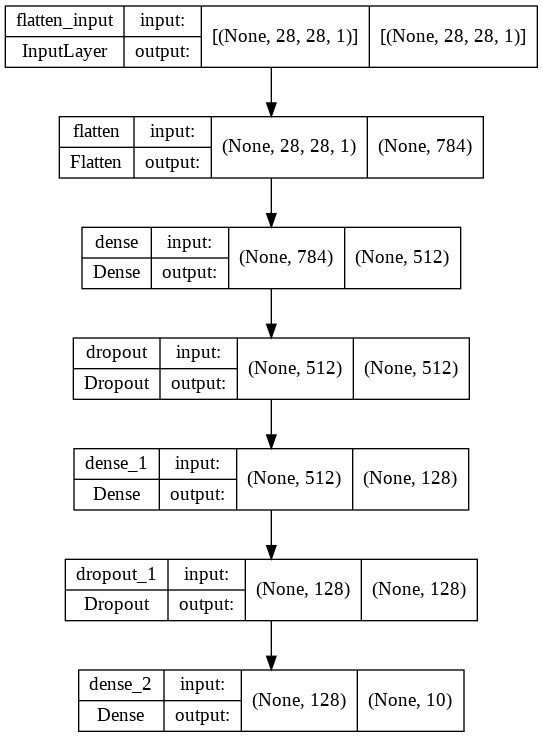

In [7]:
plot_model(model_mlp,show_shapes=True)

In [8]:
model_mlp.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_mlp = ModelCheckpoint("MLP_Fashionmodel.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [9]:
history = model_mlp.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val),batch_size=300,callbacks=[checkpoint_mlp])

Epoch 1/20
200/200 [==============================] - 4s 13ms/step - loss: 0.6881 - accuracy: 0.7577 - val_loss: 0.4657 - val_accuracy: 0.8326
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.4477 - accuracy: 0.8416 - val_loss: 0.4142 - val_accuracy: 0.8528
Epoch 3/20
200/200 [==============================] - 1s 6ms/step - loss: 0.4033 - accuracy: 0.8557 - val_loss: 0.3989 - val_accuracy: 0.8562
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.3736 - accuracy: 0.8659 - val_loss: 0.3761 - val_accuracy: 0.8666
Epoch 5/20
200/200 [==============================] - 1s 6ms/step - loss: 0.3472 - accuracy: 0.8763 - val_loss: 0.3601 - val_accuracy: 0.8700
Epoch 6/20
200/200 [==============================] - 1s 5ms/step - loss: 0.3353 - accuracy: 0.8795 - val_loss: 0.3596 - val_accuracy: 0.8730
Epoch 7/20
200/200 [==============================] - 1s 5ms/step - loss: 0.3216 - accuracy: 0.8837 - val_loss: 0.3522 - val_accuracy: 0.8756
Epoch

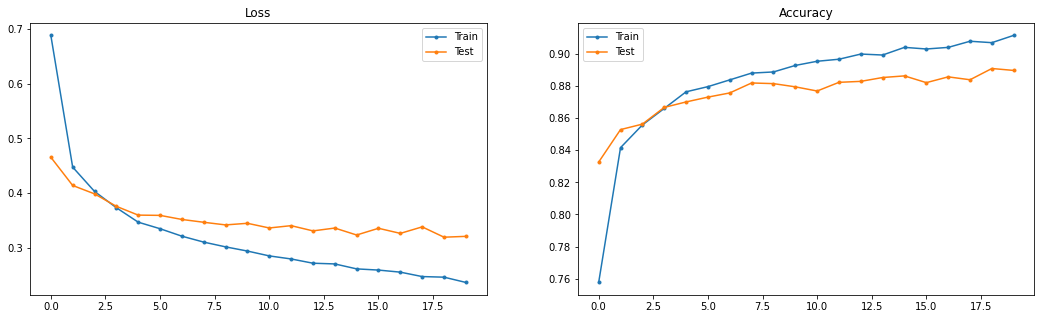

In [10]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [11]:
model_mlp.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.2988 - accuracy: 0.8936


[0.2988296151161194, 0.8935999870300293]

## CNN

In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(X_train.shape[1:])))
model_cnn.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model_cnn.add(MaxPool2D(pool_size=(2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(256,activation="relu"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10,activation="softmax"))

In [13]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                      

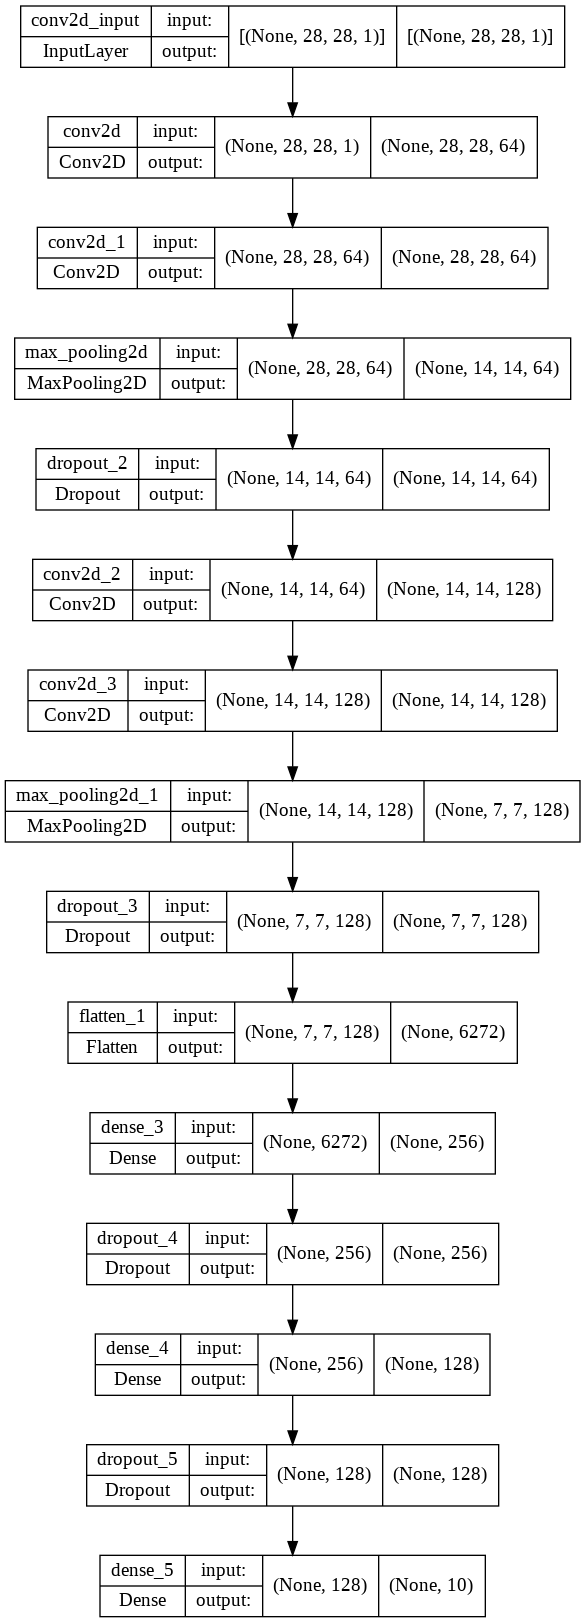

In [14]:
plot_model(model_cnn,show_shapes=True)

In [15]:
model_cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint_cnn = ModelCheckpoint("CNN_Fashionmodel.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [16]:
history = model_cnn.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test),callbacks=[checkpoint_cnn],batch_size=300)

Epoch 1/20
200/200 [==============================] - 19s 80ms/step - loss: 0.6479 - accuracy: 0.7679 - val_loss: 0.3446 - val_accuracy: 0.8694
Epoch 2/20
200/200 [==============================] - 16s 79ms/step - loss: 0.3536 - accuracy: 0.8758 - val_loss: 0.2794 - val_accuracy: 0.8942
Epoch 3/20
200/200 [==============================] - 16s 79ms/step - loss: 0.2900 - accuracy: 0.8978 - val_loss: 0.2496 - val_accuracy: 0.9070
Epoch 4/20
200/200 [==============================] - 15s 78ms/step - loss: 0.2543 - accuracy: 0.9107 - val_loss: 0.2349 - val_accuracy: 0.9134
Epoch 5/20
200/200 [==============================] - 16s 78ms/step - loss: 0.2319 - accuracy: 0.9176 - val_loss: 0.2231 - val_accuracy: 0.9188
Epoch 6/20
200/200 [==============================] - 15s 77ms/step - loss: 0.2066 - accuracy: 0.9261 - val_loss: 0.2144 - val_accuracy: 0.9212
Epoch 7/20
200/200 [==============================] - 15s 77ms/step - loss: 0.1948 - accuracy: 0.9305 - val_loss: 0.2152 - val_accuracy:

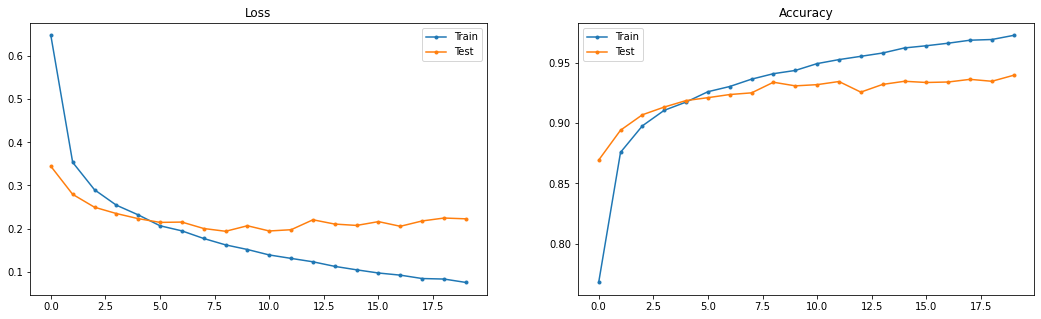

In [17]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [18]:
model_cnn.evaluate(X_test,Y_test)

157/157 [==============================] - 1s 8ms/step - loss: 0.2227 - accuracy: 0.9398


[0.22269415855407715, 0.9398000240325928]